###Imports

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate
from statistics import mean

###Reading the graph

In [ ]:
N=nx.read_graphml("net.graphml")

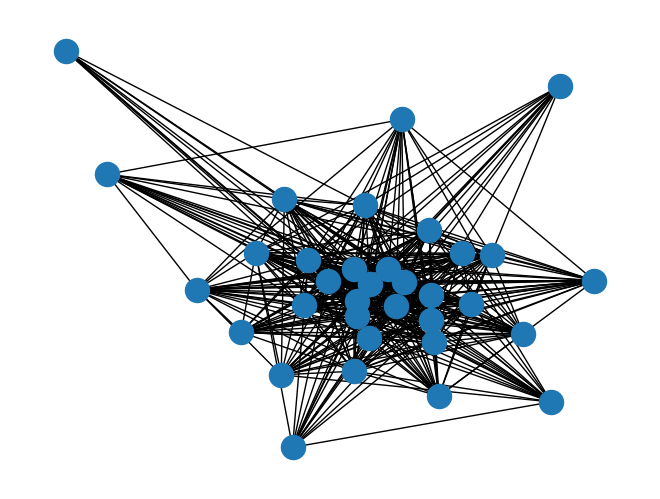

In [ ]:
nx.draw(N)
plt.show()

In [ ]:
list(N.nodes)

['Age between 65-71',
 'male',
 'asymptomatic',
 'Stage 2 hypertension',
 'high serum cholesterol',
 'FBS <= 120 mg/dl',
 'restecg ventricular hypertrophy',
 'exercise induced angina',
 'flat',
 'THAL normal',
 'Normal blood pressure',
 'reversable defect',
 'Age between 59-65',
 'female',
 'non exercise induced angina',
 'downsloping',
 'Stage 1 hypertension',
 'Age between 47-53',
 'FBS > 120 mg/dl',
 'Age between 53-59',
 'non-anginal pain',
 'fixed defect',
 'atypical angina',
 'restecg normal',
 'upsloping',
 'Age between 35-41',
 'healthy serum cholesterol',
 'Age between 41-47',
 'Elevated blood pressure',
 'HYPERTENSIVE CRISIS',
 'typical angina',
 'Age between 29-35',
 'Age between 71-77',
 'restecg wave abnormality']

###Creating sets for each community
######We separeted each community using the "Modularity Class" atribute created by Gephi when predicting the communities

In [ ]:
s1=set()
for i in N.nodes:
  if N.nodes[i]["Modularity Class"]==1:
    s1.add(i)

s0=set()
for i in N.nodes:
  if N.nodes[i]["Modularity Class"]==0:
    s0.add(i)

s2=set()
for i in N.nodes:
  if N.nodes[i]["Modularity Class"]==2:
    s2.add(i)

s3=set()
for i in N.nodes:
  if N.nodes[i]["Modularity Class"]==3:
    s3.add(i)

###Creation of subgraphs
######*We* created a subgraph for each community so we could easily calculated the centrality measures

In [ ]:
C0=nx.subgraph(N,s0)
C1=nx.subgraph(N,s1)
C2=nx.subgraph(N,s2)
C3=nx.subgraph(N,s3)

###Calculating density, cluster coefficient and degree of each community

In [ ]:
#Density
den_0=nx.density(C0)
den_1=nx.density(C1)
den_2=nx.density(C2)
den_3=nx.density(C3)

#Avg clustering coefficient
clus_0=nx.average_clustering(C0, weight="Weight")
clus_1=nx.average_clustering(C1, weight="Weight")
clus_2=nx.average_clustering(C2, weight="Weight")
clus_3=nx.average_clustering(C3, weight="Weight")

#function for calculating the avg degree since networkx calculates the degree of each node individually
def avg_deg(l):
  sum=0
  for i in l:
    sum+=i[1]
  tot=sum/len(l)
  return tot

#Avg degree
deg_0=C0.degree()
AvgDeg_0=avg_deg(deg_0)

deg_1=C1.degree()
AvgDeg_1=avg_deg(deg_1)

deg_2=C2.degree()
AvgDeg_2=avg_deg(deg_2)

deg_3=C3.degree()
AvgDeg_3=avg_deg(deg_3)

#####Building table for reporting measures

In [ ]:
data=[
    ["Community 0",C0.number_of_nodes(),AvgDeg_0,den_0,clus_0],
    ["Community 1",C1.number_of_nodes(),AvgDeg_1,den_1,clus_1],
    ["Community 2",C2.number_of_nodes(),AvgDeg_2,den_2,clus_2],
    ["Community 3",C3.number_of_nodes(),AvgDeg_3,den_3,clus_3],
]

header=["","No. Nodes","Avg. Degree","Density","Avg. Clustering Coefficient"]
print(tabulate(data, headers=header, tablefmt="grid"))

+-------------+-------------+---------------+-----------+-------------------------------+
|             |   No. Nodes |   Avg. Degree |   Density |   Avg. Clustering Coefficient |
+=============+=============+===============+===========+===============================+
| Community 0 |          11 |       8.54545 |  0.854545 |                      0.899784 |
+-------------+-------------+---------------+-----------+-------------------------------+
| Community 1 |           3 |       2       |  1        |                      1        |
+-------------+-------------+---------------+-----------+-------------------------------+
| Community 2 |           9 |       7.33333 |  0.916667 |                      0.913228 |
+-------------+-------------+---------------+-----------+-------------------------------+
| Community 3 |          11 |       8.54545 |  0.854545 |                      0.920202 |
+-------------+-------------+---------------+-----------+-------------------------------+


###Calculating Evaluation Metrics

#####Conductance

In [ ]:
cond0=nx.conductance(N,s0,weight="Weight")
cond1=nx.conductance(N,s1,weight="Weight")
cond2=nx.conductance(N,s2,weight="Weight")
cond3=nx.conductance(N,s3,weight="Weight")

print("conductance community 0: "+ str(cond0)+"\n"+"conductance community 1: "+ str(cond1)+"\n"+"conductance community 2: "+ str(cond2)+"\n"+"conductance community 3: "+ str(cond3))

conductance community 0: 0.6581818181818182
conductance community 1: 0.92
conductance community 2: 0.7142857142857143
conductance community 3: 0.6654804270462633


#####Modularity

In [ ]:
communities=[s0,s1,s2,s3] #creating a set with the different groups of nodes for method

In [ ]:
mod=nx.community.modularity(N,communities,weight="Weight", resolution=0.9)
print("community modularity: "+str(mod))

community modularity: 0.042938507006314554


##Experiment 1
#####2 communities detected with a resolution of 1

In [ ]:
N2=nx.read_graphml("net2.graphml")

In [ ]:
#Creating subgraphs
s2_1=set()
for i in N2.nodes:
  if N2.nodes[i]["Modularity Class"]==1:
    s2_1.add(i)

s2_0=set()
for i in N2.nodes:
  if N2.nodes[i]["Modularity Class"]==0:
    s2_0.add(i)

In [ ]:
#Conductance
cond2_0=nx.conductance(N2,s2_0,weight="Weight")
cond2_1=nx.conductance(N2,s2_1,weight="Weight")
print("conductance community 0: "+ str(cond2_0)+"\n"+"conductance community 1: "+ str(cond2_1))

conductance community 0: 0.6137071651090342
conductance community 1: 0.6137071651090342


In [ ]:
communities2=[s2_0,s2_1]

In [ ]:
#Modularity
mod2=nx.community.modularity(N2,communities2,weight="Weight", resolution=1)
print("community modularity: "+str(mod2))

community modularity: 0.010354703086223688


##Experiment 2
#####7 communities detected with a resolution of 0.6

In [3]:
N3=nx.read_graphml("net3.graphml")

In [4]:
#Creating subgraphs
s3_1=set()
for i in N3.nodes:
  if N3.nodes[i]["Modularity Class"]==1:
    s3_1.add(i)

s3_0=set()
for i in N3.nodes:
  if N3.nodes[i]["Modularity Class"]==0:
    s3_0.add(i)

s3_2=set()
for i in N3.nodes:
  if N3.nodes[i]["Modularity Class"]==2:
    s3_2.add(i)

s3_3=set()
for i in N3.nodes:
  if N3.nodes[i]["Modularity Class"]==3:
    s3_3.add(i)

s3_4=set()
for i in N3.nodes:
  if N3.nodes[i]["Modularity Class"]==4:
    s3_4.add(i)

s3_5=set()
for i in N3.nodes:
  if N3.nodes[i]["Modularity Class"]==5:
    s3_5.add(i)

s3_6=set()
for i in N3.nodes:
  if N3.nodes[i]["Modularity Class"]==6:
    s3_6.add(i)

In [12]:
#Conductance
cond3_0=nx.conductance(N3,s3_0,weight="Weight")
cond3_1=nx.conductance(N3,s3_1,weight="Weight")
cond3_2=nx.conductance(N3,s3_2,weight="Weight")
cond3_3=nx.conductance(N3,s3_3,weight="Weight")
cond3_4=nx.conductance(N3,s3_4,weight="Weight")
cond3_5=nx.conductance(N3,s3_5,weight="Weight")
cond3_6=nx.conductance(N3,s3_6,weight="Weight")

print("conductance community 0: "+ str(cond3_0)+"\n"+"conductance community 1: "+ str(cond3_1)+"\n"+"conductance community 2: "+ str(cond3_2)+"\n"+"conductance community 3: "+ str(cond3_3)+"\n"+"conductance community 4: "+ str(cond3_4)+"\n"+"conductance community 5: "+ str(cond3_5)+"\n"+"conductance community 6: "+ str(cond3_6))

conductance community 0: 0.7869822485207101
conductance community 1: 0.7412935323383084
conductance community 2: 0.92
conductance community 3: 0.8224852071005917
conductance community 4: 0.8918918918918919
conductance community 5: 0.9029126213592233
conductance community 6: 0.9411764705882353


In [10]:
communities3=[s3_0,s3_1,s3_2,s3_3,s3_4,s3_5,s3_6]

In [11]:
#Modularity
mod3=nx.community.modularity(N3,communities3,weight="Weight", resolution=0.6)
print("community modularity: "+str(mod3))

community modularity: 0.0689536555035772
